In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
x =df.iloc[:, [2,3]].values
y =df.iloc[:, -1].values
df.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [4]:
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
# x = np.array(ct.fit_transform(x))

In [5]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=0)

In [6]:
xtrain, ytrain

(array([[    58, 144000],
        [    59,  83000],
        [    24,  55000],
        [    26,  35000],
        [    58,  38000],
        [    42,  80000],
        [    40,  75000],
        [    59, 130000],
        [    46,  41000],
        [    41,  60000],
        [    42,  64000],
        [    37, 146000],
        [    23,  48000],
        [    25,  33000],
        [    24,  84000],
        [    27,  96000],
        [    23,  63000],
        [    48,  33000],
        [    48,  90000],
        [    42, 104000],
        [    44,  39000],
        [    32, 120000],
        [    38,  50000],
        [    32, 135000],
        [    52,  21000],
        [    53, 104000],
        [    39,  42000],
        [    38,  61000],
        [    36,  50000],
        [    36,  63000],
        [    35,  25000],
        [    35,  50000],
        [    42,  73000],
        [    47,  49000],
        [    59,  29000],
        [    49,  65000],
        [    45, 131000],
        [    31,  89000],
        [   

In [7]:
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.fit_transform(xtest)

In [8]:
xtest[5:10], ytest[5:10]

(array([[-0.77184498, -1.52502632],
        [-0.40429975, -1.68064126],
        [ 0.05513178,  2.33422397],
        [-1.59882175, -0.03112299],
        [ 1.06588117, -0.80919764]]),
 array([0, 0, 1, 0, 0], dtype=int64))

In [9]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
print(clf.predict([[-0.7718449849879597, -1.52502632475557]]))

[0]


In [11]:
ypred = clf.predict(xtest)
print(np.concatenate((ypred.reshape(len(xtest),1), ytest.reshape(len(ytest),1)), 1)[:10])

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]]


### Confusion Matrix

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(ytest,ypred)

array([[52,  6],
       [ 3, 19]], dtype=int64)

In [13]:
accuracy_score(ypred, ytest)

0.8875

### Visualising the result (based on two var only)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


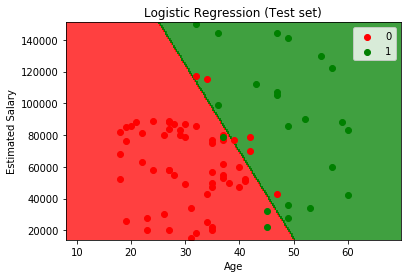

In [15]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(xtest), ytest
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, clf.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


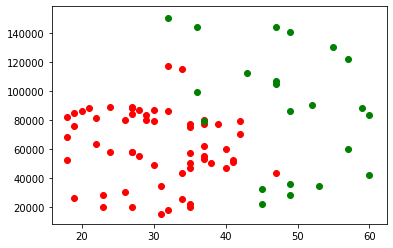

In [48]:
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

In [52]:
X_set[y_set == 0, 0]

array([30., 38., 35., 30., 35., 27., 31., 18., 47., 30., 28., 37., 39.,
       20., 32., 37., 19., 35., 35., 41., 23., 28., 29., 37., 32., 21.,
       37., 24., 18., 22., 34., 31., 27., 41., 27., 35., 27., 37., 26.,
       34., 35., 34., 29., 26., 23., 32., 19., 19., 24., 27., 40., 42.,
       35., 22., 27., 18., 42., 40.])

In [53]:
X_set[[True, False, True, False, True], 0]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 80 but corresponding boolean dimension is 4